## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_test_scaled = StandardScaler().fit_transform(X_test[["alcohol", "magnesium"]])
X_train_scaled = StandardScaler().fit_transform(X_train[["alcohol", "magnesium"]])

arr = [1, 3, 5, 10, 15, 25]
mdl = []

for n in arr:
  knn = KNeighborsClassifier(n_neighbors=n).fit(X_train_scaled, y_train)
  mdl.append(knn)
  print(f'n = {n}')
  print(f'Доля правильных ответов в тренировочной выборке: {accuracy_score(y_train, knn.predict(X_train_scaled))}')
  print(f'Доля правильных ответов в тестовой выборке: {accuracy_score(y_test, knn.predict(X_test_scaled))}')


n = 1
Доля правильных ответов в тренировочной выборке: 1.0
Доля правильных ответов в тестовой выборке: 0.5370370370370371
n = 3
Доля правильных ответов в тренировочной выборке: 0.7983870967741935
Доля правильных ответов в тестовой выборке: 0.6296296296296297
n = 5
Доля правильных ответов в тренировочной выборке: 0.782258064516129
Доля правильных ответов в тестовой выборке: 0.7037037037037037
n = 10
Доля правильных ответов в тренировочной выборке: 0.75
Доля правильных ответов в тестовой выборке: 0.6851851851851852
n = 15
Доля правильных ответов в тренировочной выборке: 0.717741935483871
Доля правильных ответов в тестовой выборке: 0.6481481481481481
n = 25
Доля правильных ответов в тренировочной выборке: 0.6935483870967742
Доля правильных ответов в тестовой выборке: 0.6666666666666666


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend


In [9]:
from sklearn import *

In [8]:
X_train_scaled

array([[ 9.82686362e-01, -7.27661028e-01],
       [ 9.57937076e-01,  6.32517621e-02],
       [ 4.01078145e-01,  6.56436355e-01],
       [ 7.72317432e-01,  3.92798758e-01],
       [-1.86348151e+00, -2.66295234e-01],
       [ 2.31914780e+00, -2.00385835e-01],
       [-1.06282215e-01, -9.25389225e-01],
       [-6.50766504e-01, -9.25389225e-01],
       [-3.20343579e-02, -2.66295234e-01],
       [ 1.44054815e+00, -3.32204633e-01],
       [-7.74512933e-01,  2.37008073e+00],
       [-3.16651145e-01,  6.32517621e-02],
       [-7.37389005e-01, -7.93570427e-01],
       [-1.41799437e+00,  2.23826193e+00],
       [ 1.00743565e+00,  9.85983350e-01],
       [ 2.22015065e+00, -5.95842230e-01],
       [ 1.16461357e-01,  1.57916794e+00],
       [-6.01267933e-01,  4.08372511e+00],
       [-4.40397574e-01, -7.93570427e-01],
       [ 1.16461357e-01, -5.29932830e-01],
       [ 1.11880743e+00, -9.25389225e-01],
       [-1.08387901e+00, -1.25493622e+00],
       [-1.40561972e+00, -9.25389225e-01],
       [-1.

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [10]:
from tqdm import tqdm

6it [09:22, 93.83s/it]


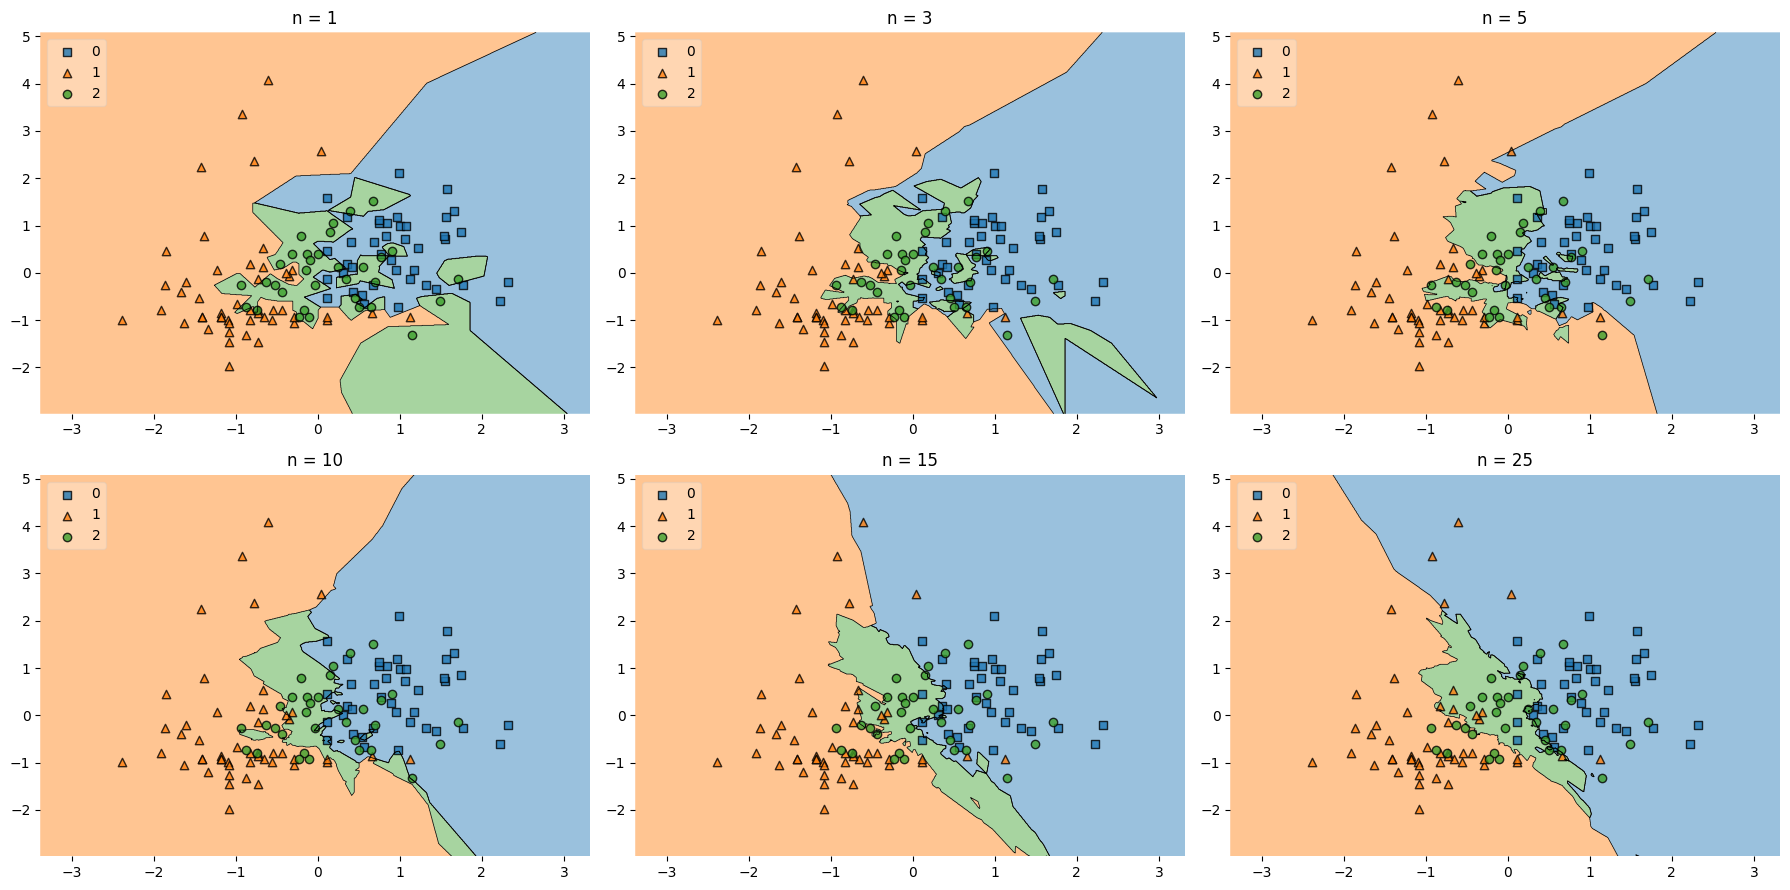

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(18,9))
i = 0
labels = ['n = 1', 'n = 3', 'n = 5', 'n = 10', 'n = 15', 'n = 25']
for clf, lab, grd in tqdm(zip(mdl,
                         labels,
                         [[x,y] for x in [0,1] for y in [0,1,2]])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.tight_layout()
plt.show()



**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
"""
Одно из важнейших рассуждений, которое исходит из геометрии данных - это отсутствие
'островков' одного класса в области другого, на мой взгляд, если также включать
результаты задачи 1.3, мы видим что при k = 10, точности на тесте достаточно хорошая,
и в графике также мало островков, и не так много случаев где точка не принадлежит
своему классу, я бы выбрал k = 10.
"""

"\nОдно из важнейших рассуждений, которое исходит из геометрии данных - это отсутствие \n'островков' одного класса в области другого, на мой взгляд, если также включать \nрезультаты задачи 1.3, мы видим что при k = 10, точности на тесте достаточно хорошая, \nи в графике также мало островков, и не так много случаев где точка не принадлежит\nсвоему классу, я бы выбрал k = 10.\n"

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

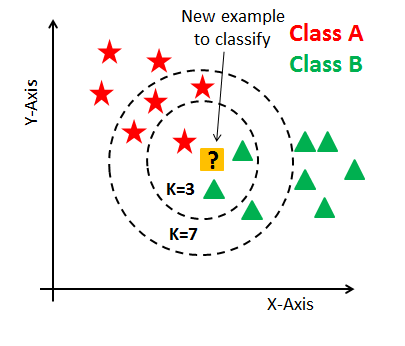

In [12]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      y_pred = np.array([])
      self.X_test = X
      for el in self.X_test:
        dist = np.array(np.linalg.norm(el - self.X_train, axis = 1))
        arr = dist.argsort()
        kNearest = Counter(self.y_train[arr[:self.k]])
        if kNearest[0] >= kNearest[1]:
          y_pred = np.append(y_pred, 0)
        else:
          y_pred = np.append(y_pred, 1)
      return y_pred


In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [14]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [15]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [16]:
data.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [17]:
data = data.drop(columns='Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

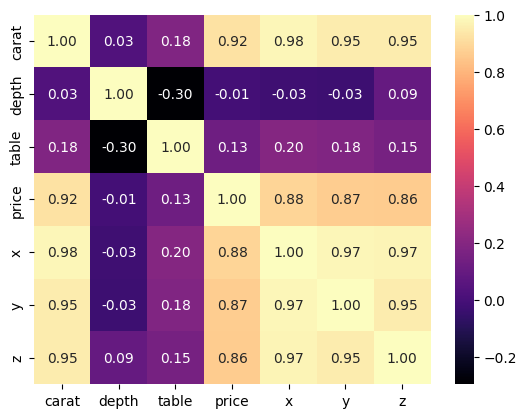

In [18]:
import seaborn as sns
ax = sns.heatmap(data.iloc[ : ,[0,4,5,6,7,8,9]].corr(), cmap="magma", annot=True, fmt="0.2f")

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [19]:
X_dum = pd.get_dummies(data, drop_first=True)
print(X_dum.shape)
X_dum.head()

(53940, 24)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [20]:
X = np.array(X_dum.drop(columns = 'price'))
y = np.array(data['price'])

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train

array([[1.21, 61.3, 57.0, ..., False, False, True],
       [0.31, 62.0, 56.0, ..., True, False, False],
       [1.21, 62.4, 57.0, ..., False, False, False],
       ...,
       [0.33, 60.3, 58.0, ..., False, False, False],
       [0.9, 62.8, 59.0, ..., False, False, False],
       [1.14, 60.4, 58.0, ..., False, False, False]], dtype=object)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [21]:
X_test_scaled = StandardScaler().fit_transform(X_test)
X_train_scaled = StandardScaler().fit_transform(X_train)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [22]:
import warnings

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'MSE for train set:{mean_squared_error(y_pred_train, y_train)}')
print(f'MSE for test set:{mean_squared_error(y_pred_test, y_test)}')

MSE for train set:1290541.9147450614
MSE for test set:1244765.4357158702


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [24]:
lr.coef_

array([ 1.12262051e+04, -6.31199113e+01, -2.70960563e+01, -9.80549238e+02,
       -5.63315299e+00, -4.81547644e+01,  5.95521080e+02,  8.46196258e+02,
        7.77769963e+02,  7.43301360e+02, -2.17028968e+02, -2.73303976e+02,
       -5.00160238e+02, -9.98634669e+02, -1.47608423e+03, -2.38198979e+03,
        5.45903730e+03,  3.75170967e+03,  2.78194055e+03,  4.65783431e+03,
        4.33672558e+03,  5.10133518e+03,  5.02829553e+03])

(array([2., 9., 4., 1., 2., 4., 0., 0., 0., 1.]),
 array([-2381.98978847, -1021.17029778,   339.6491929 ,  1700.46868359,
         3061.28817428,  4422.10766496,  5782.92715565,  7143.74664633,
         8504.56613702,  9865.38562771, 11226.20511839]),
 <BarContainer object of 10 artists>)

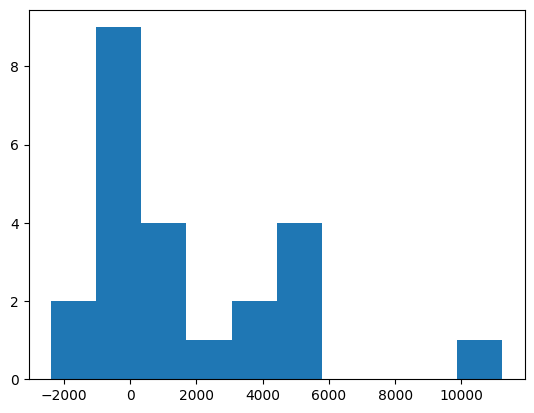

In [25]:
plt.hist(lr.coef_)

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10).fit(X_train, y_train)

lasso.fit(X_train, y_train)

X_train_lasso = lasso.predict(X_train)
X_test_lasso = lasso.predict(X_test)


In [27]:
lasso.coef_

array([ 9538.46987863,  -103.96752063,   -53.72095083,  -422.29239241,
          -0.        ,    -0.        ,    -0.        ,   145.9554578 ,
          72.18838828,    85.3493428 ,     0.        ,    -0.        ,
        -127.38487081,  -597.71837677,  -977.37433965, -1763.84492845,
        1350.10429675,     0.        ,  -799.48038153,   819.74584382,
         569.26997718,  1182.94552255,  1167.39856875])

(array([ 3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1763.84492845,  -633.61344774,   496.61803297,  1626.84951368,
         2757.08099438,  3887.31247509,  5017.5439558 ,  6147.77543651,
         7278.00691722,  8408.23839792,  9538.46987863]),
 <BarContainer object of 10 artists>)

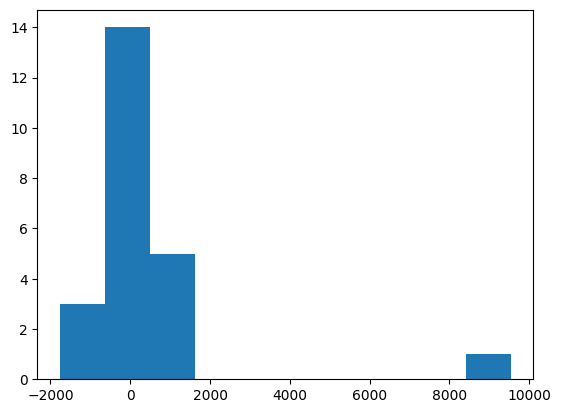

In [28]:
plt.hist(lasso.coef_)

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10).fit(X_train, y_train)

ridge.fit(X_train, y_train)

X_train_ridge = ridge.predict(X_train)
X_test_ridge = ridge.predict(X_test)

(array([2., 9., 4., 1., 3., 3., 0., 0., 0., 1.]),
 array([-2335.28161012, -1011.74043726,   311.80073561,  1635.34190848,
         2958.88308134,  4282.42425421,  5605.96542707,  6929.50659994,
         8253.0477728 ,  9576.58894567, 10900.13011853]),
 <BarContainer object of 10 artists>)

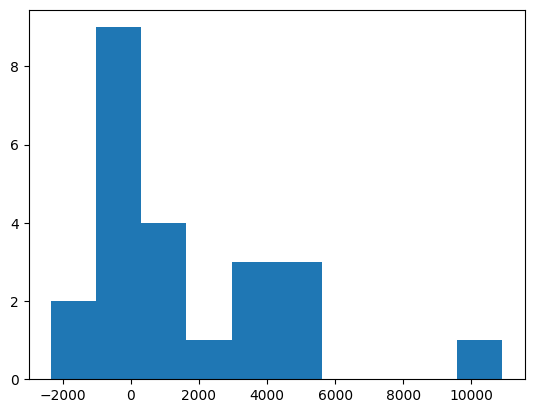

In [30]:
plt.hist(ridge.coef_)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [43]:
alpha_values = [0.1, 1, 10, 100, 200]
lassoNorm = []
ridgeNorm = []
for i in range(len(alpha_values)):
  ridge = Ridge(alpha = alpha_values[i]).fit(X_train, y_train)

  ridge.fit(X_train, y_train)

  X_train_ridge = ridge.predict(X_train)
  X_test_ridge = ridge.predict(X_test)
  ridgeNorm.append(np.linalg.norm(ridge.coef_))

  lasso = Lasso(alpha = alpha_values[i]).fit(X_train, y_train)

  lasso.fit(X_train, y_train)

  X_train_lasso = lasso.predict(X_train)
  X_test_lasso = lasso.predict(X_test)
  lassoNorm.append(np.linalg.norm(lasso.coef_))


Text(0.5, 1.0, 'Comparison of Lasso and Ridge regressions')

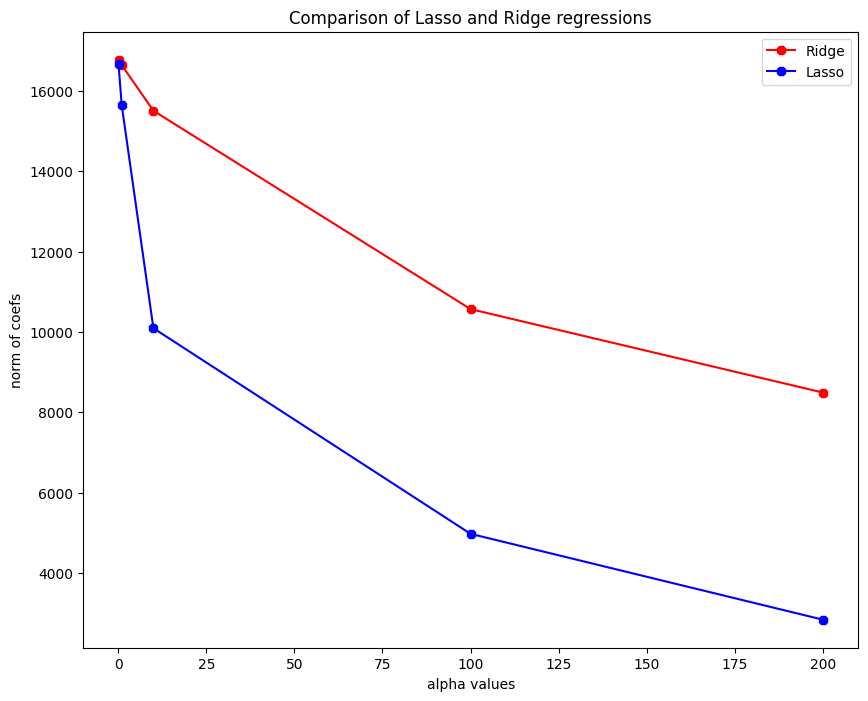

In [44]:
plt.figure(figsize=(10,8))
plt.plot( alpha_values, ridgeNorm, label = 'Ridge', color = 'red', marker = '8')
plt.plot( alpha_values, lassoNorm, label = 'Lasso', color = 'blue', marker = '8')
plt.xlabel('alpha values')
plt.ylabel('norm of coefs')
plt.legend()
plt.title('Comparison of Lasso and Ridge regressions')

In [ ]:
"""
Как видим метод Lasso намного "агрессивнее" уменьшает веса.
Допускаю, что и является главной причиной почему его чаще используют чем метод Ridge
"""

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [68]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, alphas = alpha_values).fit(X_train, y_train)
reg.fit(X_train, y_train)
arr = reg.mse_path_.mean(axis=1)
alphas = reg.alphas_
for a, err in zip(alphas, arr):
  print(f'alpha = {a}, MSE = {err:.3f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695136042.6309967, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695136042.6309967, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


alpha = 200.0, MSE = 3925517.464
alpha = 100.0, MSE = 2630682.373
alpha = 10.0, MSE = 1544993.299
alpha = 1.0, MSE = 1298252.714
alpha = 0.1, MSE = 1296033.296


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [72]:
lassoFinal = Lasso(alpha = 0.1).fit(X_train, y_train)
lassoFinal.fit(X_train, y_train)
for name, coef in zip(X_dum.drop(columns='price').columns.values, lassoFinal.coef_):
  print('{} {:.3f}'.format(name, coef))

carat 11208.579
depth -63.797
table -27.432
x -976.222
y -4.968
z -46.339
cut_Good 585.104
cut_Ideal 835.927
cut_Premium 767.570
cut_Very Good 733.616
color_E -211.660
color_F -267.970
color_G -494.279
color_H -992.486
color_I -1468.855
color_J -2373.586
clarity_IF 5402.201
clarity_SI1 3698.865
clarity_SI2 2729.627
clarity_VS1 4603.898
clarity_VS2 4283.606
clarity_VVS1 5046.457
clarity_VVS2 4974.082


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [74]:
lf = lassoFinal.predict(X_test)
basic = lr.predict(X_test)

print(f'MSE for lasso:{mean_squared_error(lf, y_test)}')
print(f'MSE for basic linreg:{mean_squared_error(basic, y_test)}')

MSE for lasso:1244347.9078636083
MSE for basic linreg:1244765.4357158702


Лассо лучше - видно из результатов